In [20]:
import numpy as np
import pandas as pd
import scanpy as sc
from scipy.stats import *
import os
from matplotlib import pyplot as plt
import seaborn as sns
from copy import copy

In [21]:
ppath = '/stanley/WangLab/Connie/02.TEMPOmap/03.revision1000Gene'
adata = sc.read_h5ad(os.path.join(ppath, 'adata', '2022-10-21-TEMPOrevision1000Gene-filtered.h5ad'))
sample_list = np.unique(adata.obs['sample'])
n_samples = len(sample_list)

In [22]:
sample_list

array(['1h_labeling', '1h_labeling_1h_wash', '1h_labeling_2h_wash',
       '1h_labeling_4h_wash', '1h_labeling_6h_wash', '20h_labeling',
       'STARmap'], dtype=object)

In [23]:
# anchor genes
_anchor = pd.read_csv(os.path.join(ppath, '1000-gene HeLa dataset anchor gene.csv'))
anchor = _anchor['Anchor gene'].values

In [24]:
sample_adata = dict()
for sample in sample_list:
    _adata = sc.read_h5ad(os.path.join(ppath, 'adata', f'TEMPO-1000gene-flt-{sample}.h5ad'))
    sample_adata[sample] = _adata

In [25]:
sample_adata['1h_labeling'].layers['anchor_normalized_expr'].shape

(2090, 991)

In [26]:
avg_20h = np.mean(sample_adata['20h_labeling'].layers['anchor_normalized_expr'], axis=0)
avg_star = np.mean(sample_adata['STARmap'].layers['anchor_normalized_expr'], axis=0)
avg_1h = np.mean(sample_adata['1h_labeling'].layers['anchor_normalized_expr'], axis=0)

In [27]:
# detection efficiency
detec_effi = avg_20h / avg_star
# detec_effi = detec_effi[np.isin(_adata.var.index, anchor, invert=True)]

In [28]:
# save csv for rena
tempo1h_star = avg_1h / avg_star
df = pd.DataFrame(zip(_adata.var_names, detec_effi, tempo1h_star), columns=['gene', '20h/star', '1h/star'])
# df.to_csv('/stanley/WangLab/Connie/02.TEMPOmap/03.revision1000Gene/efficiency.csv')

In [29]:
def remove_extremes(vec, top_pct, bot_pct):
    top_thres = np.percentile(vec, q=top_pct)
    bot_thres = np.percentile(vec, q=bot_pct)
    return vec[np.logical_and(vec<top_thres, vec>bot_thres)]

In [30]:
# remove 1% extremes on both sides
t20hstar = remove_extremes(detec_effi, 99, 1)
t1hstar = remove_extremes(tempo1h_star, 99, 1)

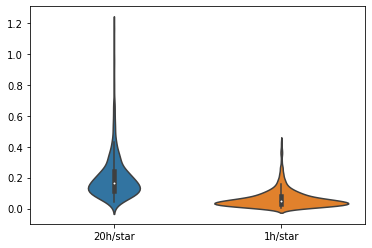

In [31]:
df_ = pd.DataFrame(zip(t20hstar, t1hstar), columns=['20h/star', '1h/star'])
sns.violinplot(data=df_)
plt.savefig(os.path.join(ppath, 'figures', '20h_star and 1h_star violinplot remove1%top+bottom.pdf'))

In [13]:
np.median(detec_effi), np.median(tempo1h_star)

(0.16504693, 0.04733382)

Text(0.5, 1.0, 'detection efficiency')

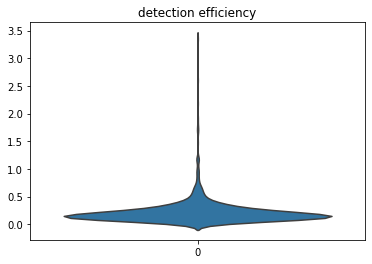

In [9]:
sns.violinplot(data=detec_effi, inner=None).set_title('detection efficiency')
# sns.swarmplot(data=detec_effi)
# plt.savefig('/stanley/WangLab/Connie/02.TEMPOmap/03.revision1000Gene/figures/detecEffi.pdf')

<AxesSubplot:>

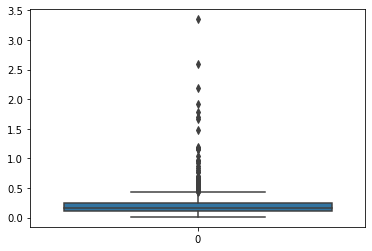

In [21]:
sns.boxplot(data=detec_effi)

<AxesSubplot:ylabel='Count'>

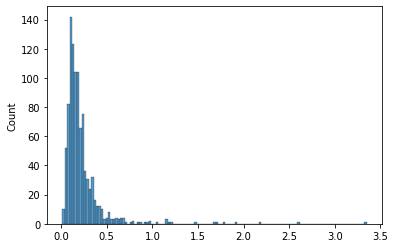

In [12]:
sns.histplot(data=detec_effi)
# plt.savefig('/stanley/WangLab/Connie/02.TEMPOmap/03.revision1000Gene/figures/detecEffi(hist).pdf')

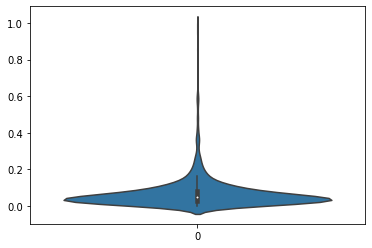

In [15]:
sns.violinplot(data=tempo1h_star)
plt.savefig('Z:/Connie/02.TEMPOmap/03.revision1000Gene/figures/1h_star(violin).pdf')

Text(0.5, 1.0, 'labeling efficiency')

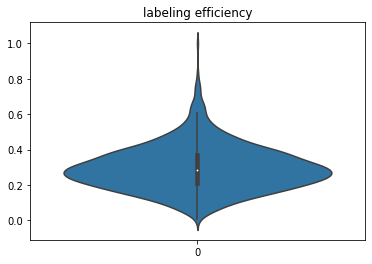

In [21]:
# labeling efficiency
label_effi = avg_1h / avg_20h
label_effi = label_effi[np.isin(_adata.var.index, anchor, invert=True)]
sns.violinplot(data=label_effi).set_title('labeling efficiency')

In [22]:
# avg_star_ = avg_star[np.isin(adata.var.index, anchor, invert=True)]

/home/unix/wangk/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'detection efficiency')

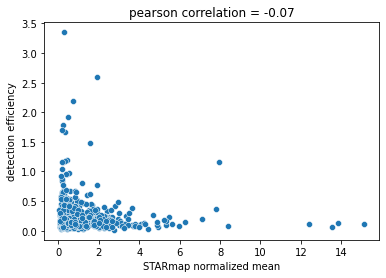

In [24]:
# correlation STARmap - detection efficiency
sns.scatterplot(avg_star, detec_effi).set_title(f'pearson correlation = {pearsonr(avg_star, detec_effi)[0]:.2f}')
plt.xlabel('STARmap normalized mean')
plt.ylabel('detection efficiency')
# plt.savefig('/stanley/WangLab/Connie/02.TEMPOmap/03.revision1000Gene/figures/detecEffi_starMean.pdf')

/home/unix/wangk/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'detection efficiency')

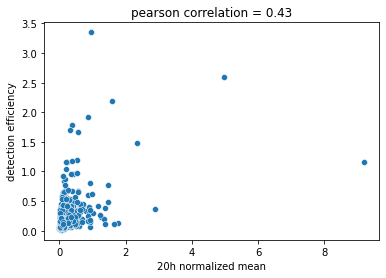

In [25]:
# correlation 20h - detection efficiency
sns.scatterplot(avg_20h, detec_effi).set_title(f'pearson correlation = {pearsonr(avg_20h, detec_effi)[0]:.2f}')
plt.xlabel('20h normalized mean')
plt.ylabel('detection efficiency')
# plt.savefig('/stanley/WangLab/Connie/02.TEMPOmap/03.revision1000Gene/figures/detecEffi_20hMean.pdf')

/home/unix/wangk/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'labeling efficiency')

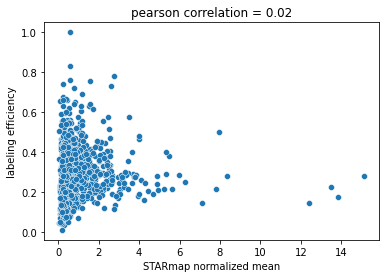

In [28]:
sns.scatterplot(avg_star, label_effi).set_title(f'pearson correlation = {pearsonr(avg_star, label_effi)[0]:.2f}')
plt.xlabel('STARmap normalized mean')
plt.ylabel('labeling efficiency')

/home/unix/wangk/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'log (20h mean / star mean)')

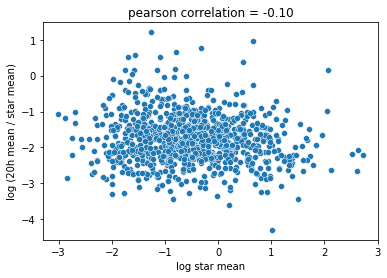

In [18]:
# 20h/star vs. star
sns.scatterplot(np.log(avg_star), np.log(avg_20h / avg_star)).set_title(f'pearson correlation = {pearsonr(np.log(avg_star), np.log(avg_20h / avg_star))[0]:.2f}')
plt.xlabel('log star mean')
plt.ylabel('log (20h mean / star mean)')

/home/unix/wangk/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '20h mean')

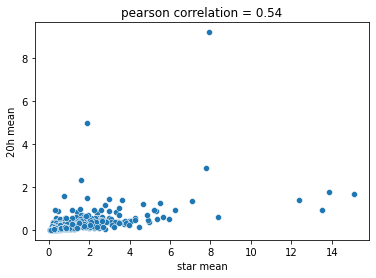

In [19]:
# 20h vs. star
sns.scatterplot(avg_star, avg_20h).set_title(f'pearson correlation = {pearsonr(avg_star, avg_20h)[0]:.2f}')
plt.xlabel('star mean')
plt.ylabel('20h mean')

/home/unix/wangk/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'log 20h mean')

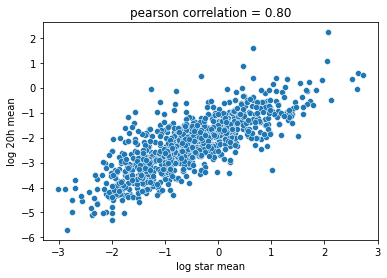

In [20]:
# 20h vs. star
sns.scatterplot(np.log(avg_star), np.log(avg_20h)).set_title(f'pearson correlation = {pearsonr(np.log(avg_star), np.log(avg_20h))[0]:.2f}')
plt.xlabel('log star mean')
plt.ylabel('log 20h mean')